## Text analysis

### Sentiment Analysis


Sentiment Distribution:
Sentiment
neutral     741200
positive    441852
negative    224276
Name: count, dtype: int64


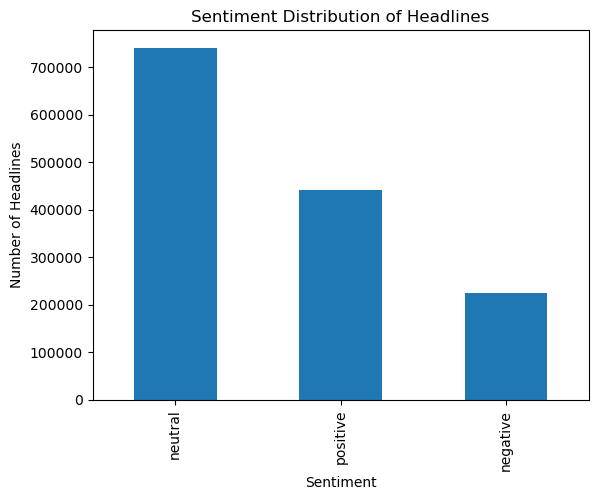

In [19]:
import pandas as pd
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# nltk.download('vader_lexicon')

df = pd.read_csv("../datasets/raw_analyst_ratings.csv")

sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis
df["Sentiment Scores"] = df["headline"].apply(sia.polarity_scores)
df["Sentiment"] = df["Sentiment Scores"].apply(
    lambda score: (
        "positive"
        if score["compound"] > 0.05
        else ("negative" if score["compound"] < -0.05 else "neutral")
    )
)

sentiment_distribution = df["Sentiment"].value_counts()
print("Sentiment Distribution:")
print(sentiment_distribution)

# Plot sentiment distribution
sentiment_distribution.plot(kind="bar", title="Sentiment Distribution of Headlines")
plt.xlabel("Sentiment")
plt.ylabel("Number of Headlines")
plt.show()

### Topic Modeling


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import spacy

# Load dataset
df = pd.read_csv("../datasets/raw_analyst_ratings.csv")

# Preprocess text: Tokenize and remove stopwords
nlp = spacy.load("en_core_web_sm")
def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)


df["clean_headline"] = df["headline"].apply(preprocess_text)

# Vectorize the headlines
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words="english")
X = vectorizer.fit_transform(df["clean_headline"])

# Perform LDA topic modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)


# Display the topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(
            " ".join(
                [feature_names[i] for i in topic.argsort()[: -no_top_words - 1 : -1]]
            )
        )
        print()


no_top_words = 10
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words) 

In [ ]:
!pip uninstall spacy
